# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Feature engineering
4. Modelling

---

## 1. Import packages

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

---
## 2. Load data

In [2]:
booking_data = pd.read_csv(r"C:\Users\Mr.Hassan\DataspellProjects\airline-booking-prediction\customer_booking.csv",encoding="ISO-8859-1")
booking_data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


---

## 3. Feature engineering

### total_trip_duration(in hours)
This could be calculated by combining the length_of_stay and flight_duration columns. It would represent the total duration of the trip, including both the time spent at the destination and the flight duration.

In [3]:
#first convert length_of_stay to hours
booking_data['length_of_stay'] = booking_data['length_of_stay'] * 24

#then add the two columns
booking_data['total_trip_duration'] = booking_data['length_of_stay'] + booking_data['flight_duration']
booking_data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_trip_duration
0,2,Internet,RoundTrip,262,456,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,461.52
1,1,Internet,RoundTrip,112,480,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,485.52
2,2,Internet,RoundTrip,243,528,17,Wed,AKLDEL,India,1,1,0,5.52,0,533.52
3,1,Internet,RoundTrip,96,744,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,749.52
4,2,Internet,RoundTrip,68,528,15,Wed,AKLDEL,India,1,0,1,5.52,0,533.52


### booking_time_of_day
This could be calculated by extracting the time of day (morning, afternoon, evening, etc.) from the flight_hour column. It could potentially be a useful feature if booking behavior varies significantly based on the time of day.


In [4]:
#extract the time of day from the flight_hour column
booking_data['flight_time_of_day'] = booking_data['flight_hour'].apply(lambda x: 'morning' if x < 12 else 'afternoon' if x < 17 else 'evening' if x < 21 else 'night')
booking_data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_trip_duration,flight_time_of_day
0,2,Internet,RoundTrip,262,456,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,461.52,morning
1,1,Internet,RoundTrip,112,480,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,485.52,morning
2,2,Internet,RoundTrip,243,528,17,Wed,AKLDEL,India,1,1,0,5.52,0,533.52,evening
3,1,Internet,RoundTrip,96,744,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,749.52,morning
4,2,Internet,RoundTrip,68,528,15,Wed,AKLDEL,India,1,0,1,5.52,0,533.52,afternoon


### flight_weekend
 This could be calculated by extracting whether the flight is on a weekend (Saturday or Sunday) from the flight_day column. It could potentially be a useful feature if booking behavior varies significantly based on whether the flight is on a weekend.

In [5]:
#extract whether the flight is on a weekend from the flight_day column
booking_data['flight_weekend'] = booking_data['flight_day'].apply(lambda x: "weekend" if x in ["Sun","Sat"] else "weekday")
booking_data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_trip_duration,flight_time_of_day,flight_weekend
0,2,Internet,RoundTrip,262,456,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,461.52,morning,weekend
1,1,Internet,RoundTrip,112,480,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,485.52,morning,weekend
2,2,Internet,RoundTrip,243,528,17,Wed,AKLDEL,India,1,1,0,5.52,0,533.52,evening,weekday
3,1,Internet,RoundTrip,96,744,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,749.52,morning,weekend
4,2,Internet,RoundTrip,68,528,15,Wed,AKLDEL,India,1,0,1,5.52,0,533.52,afternoon,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,144,9,Sat,PERPNH,Australia,1,0,1,5.62,0,149.62,morning,weekend
49996,1,Internet,RoundTrip,111,144,4,Sun,PERPNH,Australia,0,0,0,5.62,0,149.62,morning,weekend
49997,1,Internet,RoundTrip,24,144,22,Sat,PERPNH,Australia,0,0,1,5.62,0,149.62,night,weekend
49998,1,Internet,RoundTrip,15,144,11,Mon,PERPNH,Australia,1,0,1,5.62,0,149.62,morning,weekday


### origin_destination
 This could be calculated by combining the route column with the booking_origin column. It could potentially be a useful feature if booking behavior varies significantly based on the origin and destination of the flight.

In [6]:
#combine the route and booking_origin columns
booking_data['origin_destination'] = booking_data['route'] + " " + booking_data['booking_origin']
booking_data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_trip_duration,flight_time_of_day,flight_weekend,origin_destination
0,2,Internet,RoundTrip,262,456,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,461.52,morning,weekend,AKLDEL New Zealand
1,1,Internet,RoundTrip,112,480,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,485.52,morning,weekend,AKLDEL New Zealand
2,2,Internet,RoundTrip,243,528,17,Wed,AKLDEL,India,1,1,0,5.52,0,533.52,evening,weekday,AKLDEL India
3,1,Internet,RoundTrip,96,744,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,749.52,morning,weekend,AKLDEL New Zealand
4,2,Internet,RoundTrip,68,528,15,Wed,AKLDEL,India,1,0,1,5.52,0,533.52,afternoon,weekday,AKLDEL India


### extras
 This could be calculated by combining the wants_extra_baggage, wants_preferred_seat, and wants_in_flight_meals into a new column called extras if even one of these is present. It could potentially be a useful feature if booking behavior varies significantly based on the presence or absence of extra features.

In [7]:
#combine the wants_extra_baggage, wants_preferred_seat, and wants_in_flight_meals columns
booking_data['extras'] = booking_data['wants_extra_baggage'] | booking_data['wants_preferred_seat'] | booking_data['wants_in_flight_meals']
booking_data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_trip_duration,flight_time_of_day,flight_weekend,origin_destination,extras
0,2,Internet,RoundTrip,262,456,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,461.52,morning,weekend,AKLDEL New Zealand,1
1,1,Internet,RoundTrip,112,480,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,485.52,morning,weekend,AKLDEL New Zealand,0
2,2,Internet,RoundTrip,243,528,17,Wed,AKLDEL,India,1,1,0,5.52,0,533.52,evening,weekday,AKLDEL India,1
3,1,Internet,RoundTrip,96,744,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,749.52,morning,weekend,AKLDEL New Zealand,1
4,2,Internet,RoundTrip,68,528,15,Wed,AKLDEL,India,1,0,1,5.52,0,533.52,afternoon,weekday,AKLDEL India,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,144,9,Sat,PERPNH,Australia,1,0,1,5.62,0,149.62,morning,weekend,PERPNH Australia,1
49996,1,Internet,RoundTrip,111,144,4,Sun,PERPNH,Australia,0,0,0,5.62,0,149.62,morning,weekend,PERPNH Australia,0
49997,1,Internet,RoundTrip,24,144,22,Sat,PERPNH,Australia,0,0,1,5.62,0,149.62,night,weekend,PERPNH Australia,1
49998,1,Internet,RoundTrip,15,144,11,Mon,PERPNH,Australia,1,0,1,5.62,0,149.62,morning,weekday,PERPNH Australia,1


### trip_complexity
 This could be calculated by combining the trip_type and num_passengers columns. It could potentially be a useful feature if booking behavior varies significantly based on the complexity of the trip (e.g. a round trip for a large group of people may be more complex to book than a one-way trip for a single person).

In [8]:
#combine the trip_type and num_passengers columns
booking_data['trip_complexity'] = booking_data['trip_type'] + " " + booking_data['num_passengers'].astype(str)
booking_data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_trip_duration,flight_time_of_day,flight_weekend,origin_destination,extras,trip_complexity
0,2,Internet,RoundTrip,262,456,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,461.52,morning,weekend,AKLDEL New Zealand,1,RoundTrip 2
1,1,Internet,RoundTrip,112,480,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,485.52,morning,weekend,AKLDEL New Zealand,0,RoundTrip 1
2,2,Internet,RoundTrip,243,528,17,Wed,AKLDEL,India,1,1,0,5.52,0,533.52,evening,weekday,AKLDEL India,1,RoundTrip 2
3,1,Internet,RoundTrip,96,744,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,749.52,morning,weekend,AKLDEL New Zealand,1,RoundTrip 1
4,2,Internet,RoundTrip,68,528,15,Wed,AKLDEL,India,1,0,1,5.52,0,533.52,afternoon,weekday,AKLDEL India,1,RoundTrip 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,144,9,Sat,PERPNH,Australia,1,0,1,5.62,0,149.62,morning,weekend,PERPNH Australia,1,RoundTrip 2
49996,1,Internet,RoundTrip,111,144,4,Sun,PERPNH,Australia,0,0,0,5.62,0,149.62,morning,weekend,PERPNH Australia,0,RoundTrip 1
49997,1,Internet,RoundTrip,24,144,22,Sat,PERPNH,Australia,0,0,1,5.62,0,149.62,night,weekend,PERPNH Australia,1,RoundTrip 1
49998,1,Internet,RoundTrip,15,144,11,Mon,PERPNH,Australia,1,0,1,5.62,0,149.62,morning,weekday,PERPNH Australia,1,RoundTrip 1


In [9]:
booking_data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_trip_duration,extras
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,1.591240,84.940480,553.069440,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560,560.347001,0.79090
std,1.020165,90.451378,813.304081,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643,813.516760,0.40667
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000,4.670000,0.00000
25%,1.000000,21.000000,120.000000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000,126.420000,1.00000
50%,1.000000,51.000000,408.000000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000,413.620000,1.00000
75%,2.000000,115.000000,672.000000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000,680.830000,1.00000
max,9.000000,867.000000,18672.000000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000,18680.830000,1.00000


### Transforming categorical data into numerical data

A predictive model cannot accept categorical or `string` values, hence as a data scientist you need to encode categorical features into numerical representations in the most compact and discriminative way possible.

The simplest method is to map each category to an integer (label encoding), however this is not always appropriate beecause it then introduces the concept of an order into a feature which may not inherently be present `0 < 1 < 2 < 3 ...`

Another way to encode categorical features is to use `dummy variables` AKA `one hot encoding`. This create a new feature for every unique value of a categorical column, and fills this column with either a 1 or a 0 to indicate that this company does or does not belong to this category.
#### num_passengers

In [10]:
# Transform into categorical type
booking_data.num_passengers = booking_data.num_passengers.astype("category")

# Let's see how many values every unique column holds
print(f"Number of unique categories: {len(booking_data.num_passengers.value_counts())}")

booking_data = pd.get_dummies(booking_data,columns=["num_passengers"])
booking_data = booking_data.drop(columns=["num_passengers_7","num_passengers_8","num_passengers_9"])
booking_data

Number of unique categories: 9


,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,...,flight_weekend,origin_destination,extras,trip_complexity,num_passengers_1,num_passengers_2,num_passengers_3,num_passengers_4,num_passengers_5,num_passengers_6
0,Internet,RoundTrip,262,456,7,Sat,AKLDEL,New Zealand,1,0,...,weekend,AKLDEL New Zealand,1,RoundTrip 2,0,1,0,0,0,0
1,Internet,RoundTrip,112,480,3,Sat,AKLDEL,New Zealand,0,0,...,weekend,AKLDEL New Zealand,0,RoundTrip 1,1,0,0,0,0,0
2,Internet,RoundTrip,243,528,17,Wed,AKLDEL,India,1,1,...,weekday,AKLDEL India,1,RoundTrip 2,0,1,0,0,0,0
3,Internet,RoundTrip,96,744,4,Sat,AKLDEL,New Zealand,0,0,...,weekend,AKLDEL New Zealand,1,RoundTrip 1,1,0,0,0,0,0
4,Internet,RoundTrip,68,528,15,Wed,AKLDEL,India,1,0,...,weekday,AKLDEL India,1,RoundTrip 2,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Internet,RoundTrip,27,144,9,Sat,PERPNH,Australia,1,0,...,weekend,PERPNH Australia,1,RoundTrip 2,0,1,0,0,0,0
49996,Internet,RoundTrip,111,144,4,Sun,PERPNH,Australia,0,0,...,weekend,PERPNH Australia,0,RoundTrip 1,1,0,0,0,0,0
49997,Internet,RoundTrip,24,144,22,Sat,PERPNH,Australia,0,0,...,weekend,PERPNH Australia,1,RoundTrip 1,1,0,0,0,0,0
49998,Internet,RoundTrip,15,144,11,Mon,PERPNH,Australia,1,0,...,weekday,PERPNH Australia,1,RoundTrip 1,1,0,0,0,0,0


#### sales_channel
Using a simple binary encoding,we assign each category. For example, a row with "sales_channel" equal to "Internet" would have a value of 1, while a row with "sales_channel" equal to "Mobile" would have a value of 0.

In [11]:
# Transform into categorical type
booking_data.sales_channel = booking_data.sales_channel.astype("category")

# Let's see how many values every unique column holds
print(f"Number of unique categories: {len(booking_data.sales_channel.value_counts())}")

booking_data['sales_channel'] = booking_data['sales_channel'].replace(['Internet', 'Mobile'], [1, 0])
booking_data

Number of unique categories: 2


,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,...,flight_weekend,origin_destination,extras,trip_complexity,num_passengers_1,num_passengers_2,num_passengers_3,num_passengers_4,num_passengers_5,num_passengers_6
0,1,RoundTrip,262,456,7,Sat,AKLDEL,New Zealand,1,0,...,weekend,AKLDEL New Zealand,1,RoundTrip 2,0,1,0,0,0,0
1,1,RoundTrip,112,480,3,Sat,AKLDEL,New Zealand,0,0,...,weekend,AKLDEL New Zealand,0,RoundTrip 1,1,0,0,0,0,0
2,1,RoundTrip,243,528,17,Wed,AKLDEL,India,1,1,...,weekday,AKLDEL India,1,RoundTrip 2,0,1,0,0,0,0
3,1,RoundTrip,96,744,4,Sat,AKLDEL,New Zealand,0,0,...,weekend,AKLDEL New Zealand,1,RoundTrip 1,1,0,0,0,0,0
4,1,RoundTrip,68,528,15,Wed,AKLDEL,India,1,0,...,weekday,AKLDEL India,1,RoundTrip 2,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,RoundTrip,27,144,9,Sat,PERPNH,Australia,1,0,...,weekend,PERPNH Australia,1,RoundTrip 2,0,1,0,0,0,0
49996,1,RoundTrip,111,144,4,Sun,PERPNH,Australia,0,0,...,weekend,PERPNH Australia,0,RoundTrip 1,1,0,0,0,0,0
49997,1,RoundTrip,24,144,22,Sat,PERPNH,Australia,0,0,...,weekend,PERPNH Australia,1,RoundTrip 1,1,0,0,0,0,0
49998,1,RoundTrip,15,144,11,Mon,PERPNH,Australia,1,0,...,weekday,PERPNH Australia,1,RoundTrip 1,1,0,0,0,0,0


#### trip_type

In [12]:
# Transform into categorical type
booking_data.trip_type = booking_data.trip_type.astype("category")

# Let's see how many values every unique column holds
print(f"Number of unique categories: {len(booking_data.trip_type.value_counts())}")

booking_data = pd.get_dummies(booking_data,columns=["trip_type"])
booking_data

Number of unique categories: 3


,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,...,trip_complexity,num_passengers_1,num_passengers_2,num_passengers_3,num_passengers_4,num_passengers_5,num_passengers_6,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,1,262,456,7,Sat,AKLDEL,New Zealand,1,0,0,...,RoundTrip 2,0,1,0,0,0,0,0,0,1
1,1,112,480,3,Sat,AKLDEL,New Zealand,0,0,0,...,RoundTrip 1,1,0,0,0,0,0,0,0,1
2,1,243,528,17,Wed,AKLDEL,India,1,1,0,...,RoundTrip 2,0,1,0,0,0,0,0,0,1
3,1,96,744,4,Sat,AKLDEL,New Zealand,0,0,1,...,RoundTrip 1,1,0,0,0,0,0,0,0,1
4,1,68,528,15,Wed,AKLDEL,India,1,0,1,...,RoundTrip 2,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,27,144,9,Sat,PERPNH,Australia,1,0,1,...,RoundTrip 2,0,1,0,0,0,0,0,0,1
49996,1,111,144,4,Sun,PERPNH,Australia,0,0,0,...,RoundTrip 1,1,0,0,0,0,0,0,0,1
49997,1,24,144,22,Sat,PERPNH,Australia,0,0,1,...,RoundTrip 1,1,0,0,0,0,0,0,0,1
49998,1,15,144,11,Mon,PERPNH,Australia,1,0,1,...,RoundTrip 1,1,0,0,0,0,0,0,0,1


#### flight_day

In [13]:
# Transform into categorical type
booking_data.flight_day = booking_data.flight_day.astype("category")

# Let's see how many values every unique column holds
print(f"Number of unique categories: {len(booking_data.flight_day.value_counts())}")

booking_data = pd.get_dummies(booking_data,columns=["flight_day"])
booking_data

Number of unique categories: 7


,sales_channel,purchase_lead,length_of_stay,flight_hour,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,...,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
0,1,262,456,7,AKLDEL,New Zealand,1,0,0,5.52,...,0,0,1,0,0,1,0,0,0,0
1,1,112,480,3,AKLDEL,New Zealand,0,0,0,5.52,...,0,0,1,0,0,1,0,0,0,0
2,1,243,528,17,AKLDEL,India,1,1,0,5.52,...,0,0,1,0,0,0,0,0,0,1
3,1,96,744,4,AKLDEL,New Zealand,0,0,1,5.52,...,0,0,1,0,0,1,0,0,0,0
4,1,68,528,15,AKLDEL,India,1,0,1,5.52,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,27,144,9,PERPNH,Australia,1,0,1,5.62,...,0,0,1,0,0,1,0,0,0,0
49996,1,111,144,4,PERPNH,Australia,0,0,0,5.62,...,0,0,1,0,0,0,1,0,0,0
49997,1,24,144,22,PERPNH,Australia,0,0,1,5.62,...,0,0,1,0,0,1,0,0,0,0
49998,1,15,144,11,PERPNH,Australia,1,0,1,5.62,...,0,0,1,0,1,0,0,0,0,0


#### route

In [14]:
# Set the frequency threshold for grouping low-frequency categories
threshold = 208

# Count the number of occurrences of each category
counts = booking_data['route'].value_counts()

# Create a mask for selecting categories with a frequency greater than or equal to the threshold
mask = counts >= threshold

# Replace the low-frequency categories with 'Other'
booking_data['route'] = booking_data['route'].apply(lambda x: x if mask.loc[x] else 'Other')

# Encode the categories using one hot encoding
booking_data = pd.get_dummies(booking_data, columns=['route'])
booking_data

,sales_channel,purchase_lead,length_of_stay,flight_hour,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,route_OOLSGN,route_Other,route_PENPER,route_PENPVG,route_PENSYD,route_PENTPE,route_PERPNH,route_PERSGN,route_PERTPE,route_SGNSYD
0,1,262,456,7,New Zealand,1,0,0,5.52,0,...,0,1,0,0,0,0,0,0,0,0
1,1,112,480,3,New Zealand,0,0,0,5.52,0,...,0,1,0,0,0,0,0,0,0,0
2,1,243,528,17,India,1,1,0,5.52,0,...,0,1,0,0,0,0,0,0,0,0
3,1,96,744,4,New Zealand,0,0,1,5.52,0,...,0,1,0,0,0,0,0,0,0,0
4,1,68,528,15,India,1,0,1,5.52,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,27,144,9,Australia,1,0,1,5.62,0,...,0,0,0,0,0,0,1,0,0,0
49996,1,111,144,4,Australia,0,0,0,5.62,0,...,0,0,0,0,0,0,1,0,0,0
49997,1,24,144,22,Australia,0,0,1,5.62,0,...,0,0,0,0,0,0,1,0,0,0
49998,1,15,144,11,Australia,1,0,1,5.62,0,...,0,0,0,0,0,0,1,0,0,0


#### booking_origin

In [15]:
# Set the frequency threshold for grouping low-frequency categories
threshold = 1044

# Count the number of occurrences of each category
counts = booking_data['booking_origin'].value_counts()

# Create a mask for selecting categories with a frequency greater than or equal to the threshold
mask = counts >= threshold

# Replace the low-frequency categories with 'Other'
booking_data['booking_origin'] = booking_data['booking_origin'].apply(lambda x: x if mask.loc[x] else 'Other')

# Encode the categories using one hot encoding
booking_data = pd.get_dummies(booking_data, columns=['booking_origin'])
booking_data

,sales_channel,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_trip_duration,...,booking_origin_India,booking_origin_Indonesia,booking_origin_Japan,booking_origin_Malaysia,booking_origin_New Zealand,booking_origin_Other,booking_origin_Singapore,booking_origin_South Korea,booking_origin_Taiwan,booking_origin_Thailand
0,1,262,456,7,1,0,0,5.52,0,461.52,...,0,0,0,0,1,0,0,0,0,0
1,1,112,480,3,0,0,0,5.52,0,485.52,...,0,0,0,0,1,0,0,0,0,0
2,1,243,528,17,1,1,0,5.52,0,533.52,...,1,0,0,0,0,0,0,0,0,0
3,1,96,744,4,0,0,1,5.52,0,749.52,...,0,0,0,0,1,0,0,0,0,0
4,1,68,528,15,1,0,1,5.52,0,533.52,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,27,144,9,1,0,1,5.62,0,149.62,...,0,0,0,0,0,0,0,0,0,0
49996,1,111,144,4,0,0,0,5.62,0,149.62,...,0,0,0,0,0,0,0,0,0,0
49997,1,24,144,22,0,0,1,5.62,0,149.62,...,0,0,0,0,0,0,0,0,0,0
49998,1,15,144,11,1,0,1,5.62,0,149.62,...,0,0,0,0,0,0,0,0,0,0


#### flight_duration

In [16]:
# Transform into categorical type
booking_data.flight_duration = booking_data.flight_duration.astype("category")

# Let's see how many values every unique column holds
print(f"Number of unique categories: {len(booking_data.flight_duration.value_counts())}")

booking_data = pd.get_dummies(booking_data,columns=["flight_duration"])
booking_data = booking_data.drop(columns=["flight_duration_9.5","flight_duration_5.13","flight_duration_4.83"])
booking_data

Number of unique categories: 21


,sales_channel,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_complete,total_trip_duration,flight_time_of_day,...,flight_duration_6.33,flight_duration_6.42,flight_duration_6.62,flight_duration_7.0,flight_duration_7.42,flight_duration_7.57,flight_duration_8.15,flight_duration_8.58,flight_duration_8.67,flight_duration_8.83
0,1,262,456,7,1,0,0,0,461.52,morning,...,0,0,0,0,0,0,0,0,0,0
1,1,112,480,3,0,0,0,0,485.52,morning,...,0,0,0,0,0,0,0,0,0,0
2,1,243,528,17,1,1,0,0,533.52,evening,...,0,0,0,0,0,0,0,0,0,0
3,1,96,744,4,0,0,1,0,749.52,morning,...,0,0,0,0,0,0,0,0,0,0
4,1,68,528,15,1,0,1,0,533.52,afternoon,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,27,144,9,1,0,1,0,149.62,morning,...,0,0,0,0,0,0,0,0,0,0
49996,1,111,144,4,0,0,0,0,149.62,morning,...,0,0,0,0,0,0,0,0,0,0
49997,1,24,144,22,0,0,1,0,149.62,night,...,0,0,0,0,0,0,0,0,0,0
49998,1,15,144,11,1,0,1,0,149.62,morning,...,0,0,0,0,0,0,0,0,0,0


#### flight_time_of_day

In [17]:
# Transform into categorical type
booking_data.flight_time_of_day = booking_data.flight_time_of_day.astype("category")

# Let's see how many values every unique column holds
print(f"Number of unique categories: {len(booking_data.flight_time_of_day.value_counts())}")

booking_data = pd.get_dummies(booking_data,columns=["flight_time_of_day"])
booking_data

Number of unique categories: 4


,sales_channel,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_complete,total_trip_duration,flight_weekend,...,flight_duration_7.42,flight_duration_7.57,flight_duration_8.15,flight_duration_8.58,flight_duration_8.67,flight_duration_8.83,flight_time_of_day_afternoon,flight_time_of_day_evening,flight_time_of_day_morning,flight_time_of_day_night
0,1,262,456,7,1,0,0,0,461.52,weekend,...,0,0,0,0,0,0,0,0,1,0
1,1,112,480,3,0,0,0,0,485.52,weekend,...,0,0,0,0,0,0,0,0,1,0
2,1,243,528,17,1,1,0,0,533.52,weekday,...,0,0,0,0,0,0,0,1,0,0
3,1,96,744,4,0,0,1,0,749.52,weekend,...,0,0,0,0,0,0,0,0,1,0
4,1,68,528,15,1,0,1,0,533.52,weekday,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,27,144,9,1,0,1,0,149.62,weekend,...,0,0,0,0,0,0,0,0,1,0
49996,1,111,144,4,0,0,0,0,149.62,weekend,...,0,0,0,0,0,0,0,0,1,0
49997,1,24,144,22,0,0,1,0,149.62,weekend,...,0,0,0,0,0,0,0,0,0,1
49998,1,15,144,11,1,0,1,0,149.62,weekday,...,0,0,0,0,0,0,0,0,1,0


#### flight_weekend

In [18]:
# Transform into categorical type
booking_data.flight_weekend = booking_data.flight_weekend.astype("category")

# Let's see how many values every unique column holds
print(f"Number of unique categories: {len(booking_data.flight_weekend.value_counts())}")

booking_data = pd.get_dummies(booking_data,columns=["flight_weekend"])
booking_data

Number of unique categories: 2


,sales_channel,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_complete,total_trip_duration,origin_destination,...,flight_duration_8.15,flight_duration_8.58,flight_duration_8.67,flight_duration_8.83,flight_time_of_day_afternoon,flight_time_of_day_evening,flight_time_of_day_morning,flight_time_of_day_night,flight_weekend_weekday,flight_weekend_weekend
0,1,262,456,7,1,0,0,0,461.52,AKLDEL New Zealand,...,0,0,0,0,0,0,1,0,0,1
1,1,112,480,3,0,0,0,0,485.52,AKLDEL New Zealand,...,0,0,0,0,0,0,1,0,0,1
2,1,243,528,17,1,1,0,0,533.52,AKLDEL India,...,0,0,0,0,0,1,0,0,1,0
3,1,96,744,4,0,0,1,0,749.52,AKLDEL New Zealand,...,0,0,0,0,0,0,1,0,0,1
4,1,68,528,15,1,0,1,0,533.52,AKLDEL India,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,27,144,9,1,0,1,0,149.62,PERPNH Australia,...,0,0,0,0,0,0,1,0,0,1
49996,1,111,144,4,0,0,0,0,149.62,PERPNH Australia,...,0,0,0,0,0,0,1,0,0,1
49997,1,24,144,22,0,0,1,0,149.62,PERPNH Australia,...,0,0,0,0,0,0,0,1,0,1
49998,1,15,144,11,1,0,1,0,149.62,PERPNH Australia,...,0,0,0,0,0,0,1,0,1,0


#### trip_complexity

In [19]:
# Set the frequency threshold for grouping low-frequency categories
threshold = 1764

# Count the number of occurrences of each category
counts = booking_data['trip_complexity'].value_counts()

# Create a mask for selecting categories with a frequency greater than or equal to the threshold
mask = counts >= threshold

# Replace the low-frequency categories with 'Other'
booking_data['trip_complexity'] = booking_data['trip_complexity'].apply(lambda x: x if mask.loc[x] else 'Other')

# Encode the categories using one hot encoding
booking_data = pd.get_dummies(booking_data, columns=['trip_complexity'])
booking_data

,sales_channel,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_complete,total_trip_duration,origin_destination,...,flight_time_of_day_evening,flight_time_of_day_morning,flight_time_of_day_night,flight_weekend_weekday,flight_weekend_weekend,trip_complexity_Other,trip_complexity_RoundTrip 1,trip_complexity_RoundTrip 2,trip_complexity_RoundTrip 3,trip_complexity_RoundTrip 4
0,1,262,456,7,1,0,0,0,461.52,AKLDEL New Zealand,...,0,1,0,0,1,0,0,1,0,0
1,1,112,480,3,0,0,0,0,485.52,AKLDEL New Zealand,...,0,1,0,0,1,0,1,0,0,0
2,1,243,528,17,1,1,0,0,533.52,AKLDEL India,...,1,0,0,1,0,0,0,1,0,0
3,1,96,744,4,0,0,1,0,749.52,AKLDEL New Zealand,...,0,1,0,0,1,0,1,0,0,0
4,1,68,528,15,1,0,1,0,533.52,AKLDEL India,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,27,144,9,1,0,1,0,149.62,PERPNH Australia,...,0,1,0,0,1,0,0,1,0,0
49996,1,111,144,4,0,0,0,0,149.62,PERPNH Australia,...,0,1,0,0,1,0,1,0,0,0
49997,1,24,144,22,0,0,1,0,149.62,PERPNH Australia,...,0,0,1,0,1,0,1,0,0,0
49998,1,15,144,11,1,0,1,0,149.62,PERPNH Australia,...,0,1,0,1,0,0,1,0,0,0


#### origin_destination

In [21]:
# Set the frequency threshold for grouping low-frequency categories
threshold = 721

# Count the number of occurrences of each category
counts = booking_data['origin_destination'].value_counts()

# Create a mask for selecting categories with a frequency greater than or equal to the threshold
mask = counts >= threshold

# Replace the low-frequency categories with 'Other'
booking_data['origin_destination'] = booking_data['origin_destination'].apply(lambda x: x if mask.loc[x] else 'Other')

# Encode the categories using one hot encoding
booking_data = pd.get_dummies(booking_data, columns=['origin_destination'])
booking_data

,sales_channel,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_complete,total_trip_duration,extras,...,flight_weekend_weekend,trip_complexity_Other,trip_complexity_RoundTrip 1,trip_complexity_RoundTrip 2,trip_complexity_RoundTrip 3,trip_complexity_RoundTrip 4,origin_destination_AKLKUL Malaysia,origin_destination_AKLKUL New Zealand,origin_destination_MELSGN Australia,origin_destination_Other
0,1,262,456,7,1,0,0,0,461.52,1,...,1,0,0,1,0,0,0,0,0,1
1,1,112,480,3,0,0,0,0,485.52,0,...,1,0,1,0,0,0,0,0,0,1
2,1,243,528,17,1,1,0,0,533.52,1,...,0,0,0,1,0,0,0,0,0,1
3,1,96,744,4,0,0,1,0,749.52,1,...,1,0,1,0,0,0,0,0,0,1
4,1,68,528,15,1,0,1,0,533.52,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,27,144,9,1,0,1,0,149.62,1,...,1,0,0,1,0,0,0,0,0,1
49996,1,111,144,4,0,0,0,0,149.62,0,...,1,0,1,0,0,0,0,0,0,1
49997,1,24,144,22,0,0,1,0,149.62,1,...,1,0,1,0,0,0,0,0,0,1
49998,1,15,144,11,1,0,1,0,149.62,1,...,0,0,1,0,0,0,0,0,0,1


### Transforming numerical data

In the previous exercise we saw that some variables were highly skewed. The reason why we need to treat skewness is because some predictive models have inherent assumptions about the distribution of the features that are being supplied to it. Such models are called `parametric` models, and they typically assume that all variables are both independent and normally distributed.

Skewness isn't always a bad thing, but as a rule of thumb it is always good practice to treat highly skewed variables because of the reason stated above, but also as it can improve the speed at which predictive models are able to converge to its best solution.

There are many ways that you can treat skewed variables. You can apply transformations such as:
- Square root
- Cubic root
- Logarithm

to a continuous numeric column and you will notice the distribution changes. For this use case we will use the 'Logarithm' transformation for the positively skewed features.

<b>Note:</b> We cannot apply log to a value of 0, so we will add a constant of 1 to all the values

In [22]:
# # Apply log10 transformation
# booking_data["purchase_lead"] = np.log10(booking_data["purchase_lead"] + 1)
# booking_data["length_of_stay"] = np.log10(booking_data["length_of_stay"] + 1)
# booking_data["flight_hour"] = np.log10(booking_data["flight_hour"] + 1)
# booking_data["total_trip_duration"] = np.log10(booking_data["total_trip_duration"] + 1)
# booking_data

# 5.Modelling
We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a Random Forest classifier.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

### Data sampling
The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.
A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [24]:
# Split the data into training and test samples
# Make a copy of our data
train_df = booking_data.copy()

# Separate target variable from independent variables
X = booking_data.drop(columns=["booking_complete"])
y = booking_data["booking_complete"]
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (50000, 133)
y shape:  (50000,)


In [25]:
# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (40000, 133)
y_train shape:  (40000,)
X_test shape:  (10000, 133)
y_test shape:  (10000,)


### Training the model

In [26]:
# Train the model
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [27]:
# Predict on the test sample
prediction = model.predict(X_test)

# Calculate the accuracy of the model
tn, fp, fn, tp = metrics.confusion_matrix(y_test, prediction).ravel()

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}")

print(f"Accuracy: {metrics.accuracy_score(y_test, prediction)*100}%")
print(f"Precision: {metrics.precision_score(y_test, prediction)*100}%")
print(f"Recall: {metrics.recall_score(y_test, prediction)*100}%")
print(f"F1 score: {metrics.f1_score(y_test, prediction)*100}%")


True positives: 174
False positives: 174
True negatives: 8346
False negatives: 1306
Accuracy: 85.2%
Precision: 50.0%
Recall: 11.756756756756758%
F1 score: 19.037199124726477%


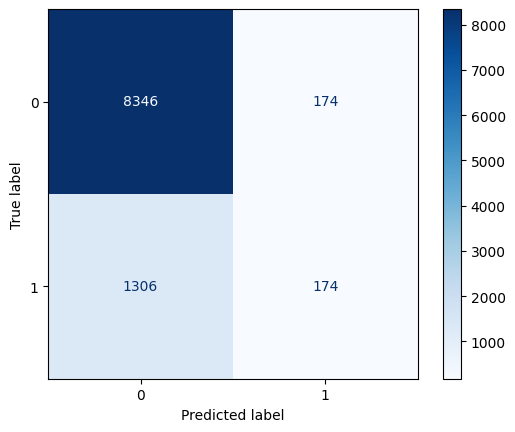

In [28]:
# Plot the confusion matrix
metrics.plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

### Model understanding
A simple way of understanding the results of a model is to look at feature importances. Feature importances indicate the importance of a feature within the predictive model, there are several ways to calculate feature importance, but with the Random Forest classifier, we’re able to extract feature importances using the built-in method on the trained model. In the Random Forest case, the feature importance represents the number of times each feature is used for splitting across all trees.

In [29]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()
feature_importances

,index,features,importance
0,37,route_DELSYD,0.000168
1,15,trip_type_CircleTrip,0.000245
2,61,route_ICNOOL,0.000266
3,31,route_CMBSYD,0.000270
4,131,origin_destination_MELSGN Australia,0.000284
...,...,...,...
128,93,booking_origin_Malaysia,0.029051
129,2,length_of_stay,0.082183
130,7,total_trip_duration,0.098467
131,3,flight_hour,0.105536


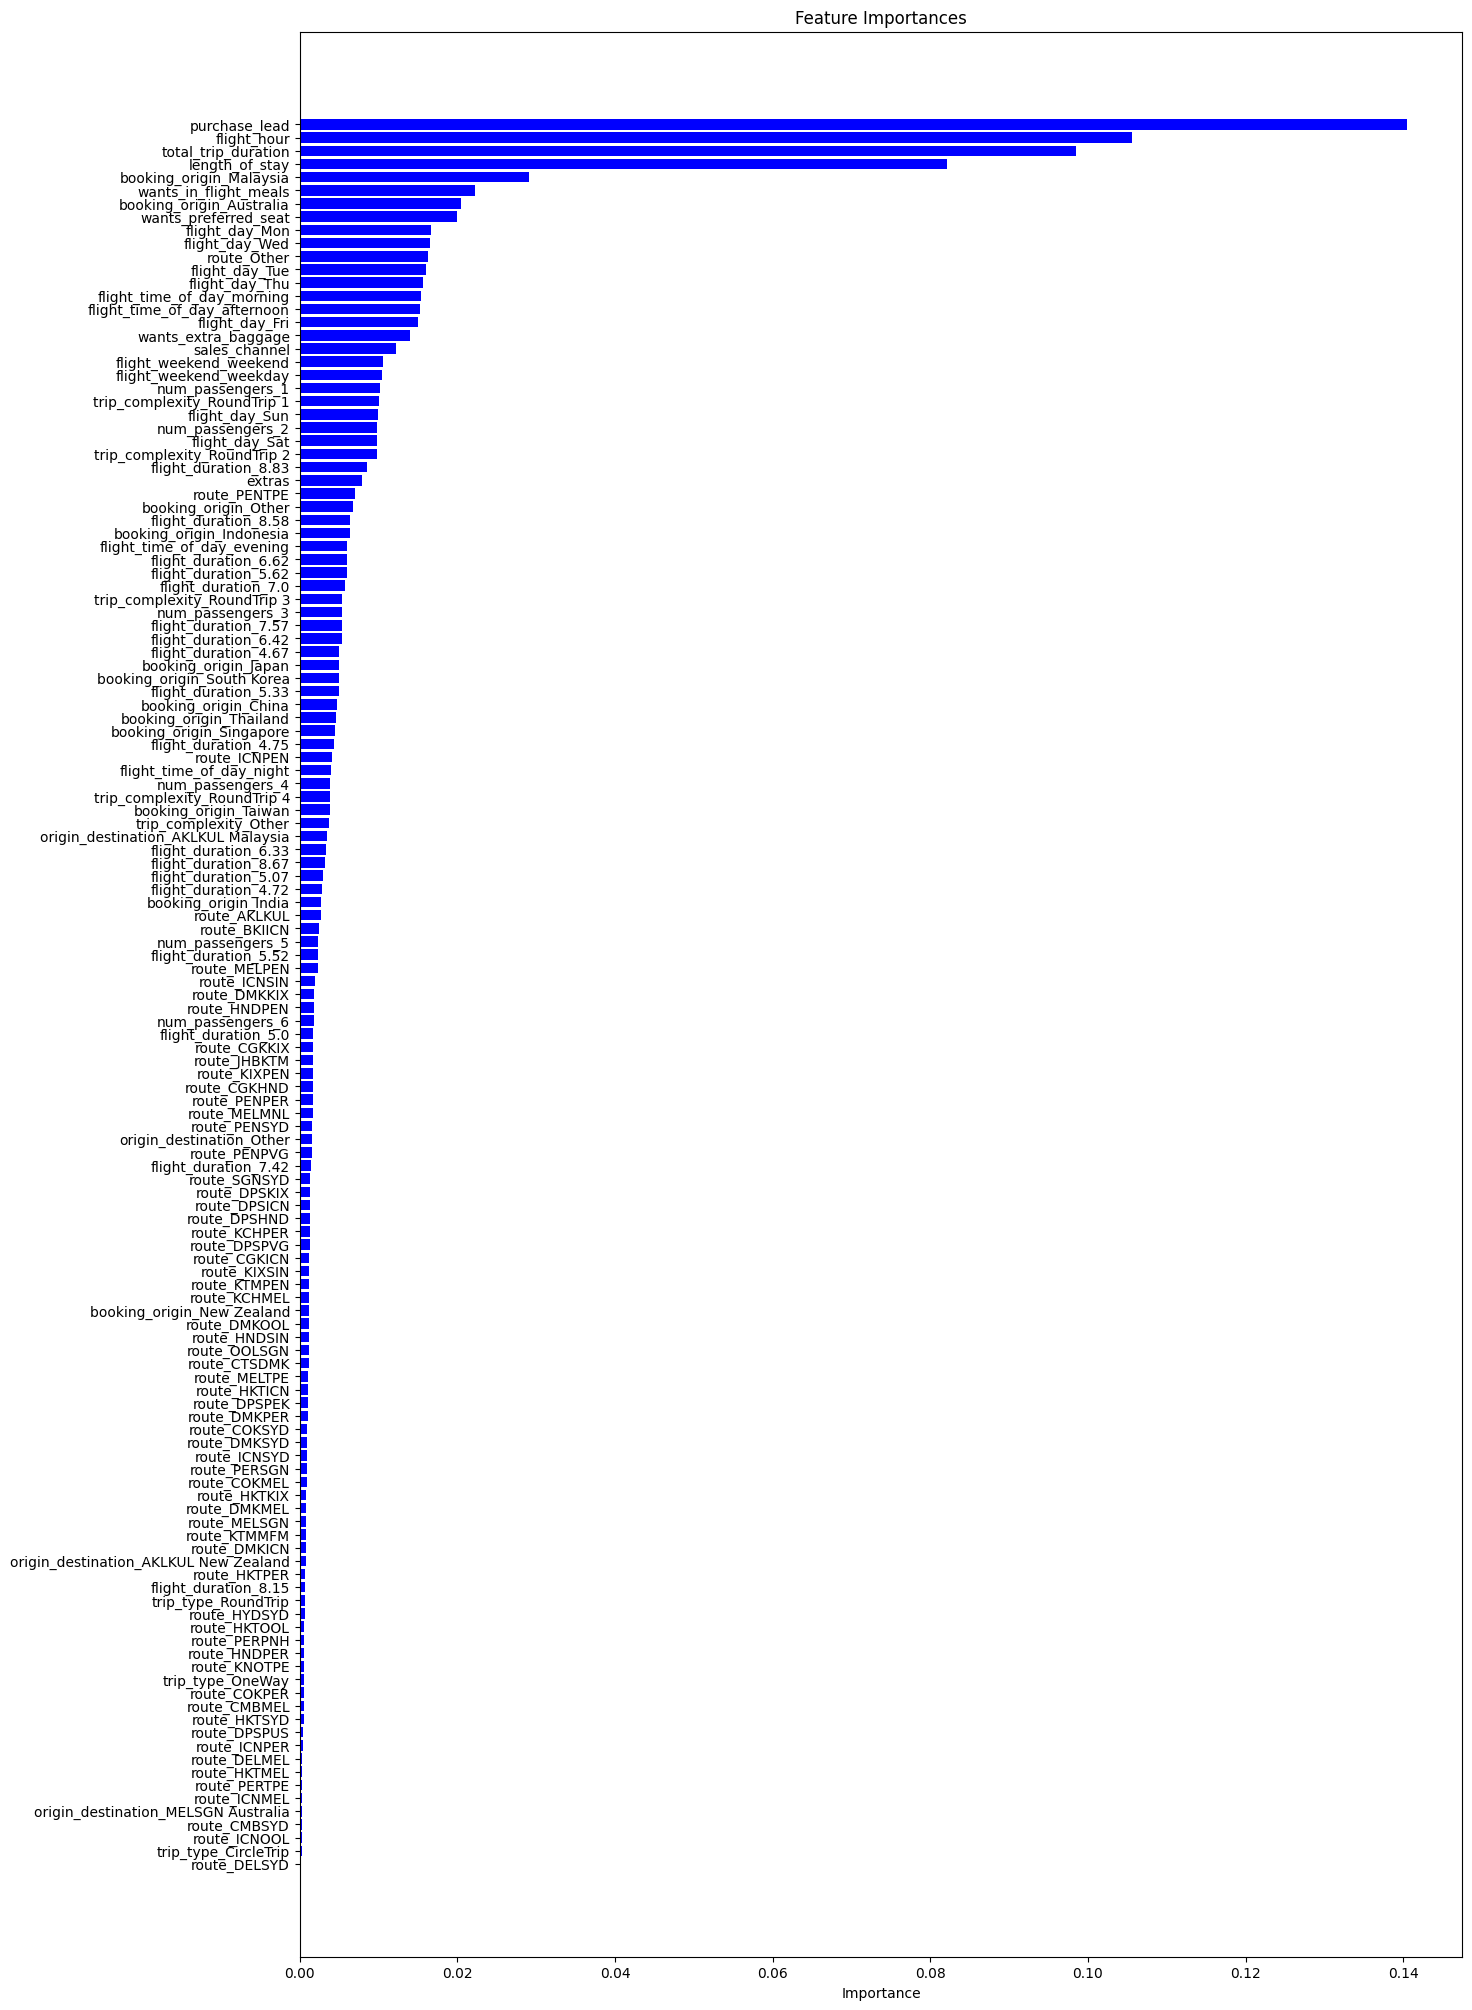

In [30]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

In [43]:

threshold = 0.005696  # Set the threshold for feature importance

# Get the names of the columns with feature importances above the threshold
X_important = feature_importances[feature_importances['importance'] >= threshold]['features']
X_important = X[X_important]

,flight_duration_5.62,flight_duration_6.62,flight_time_of_day_evening,booking_origin_Indonesia,flight_duration_8.58,booking_origin_Other,route_PENTPE,extras,flight_duration_8.83,trip_complexity_RoundTrip 2,...,flight_day_Wed,flight_day_Mon,wants_preferred_seat,booking_origin_Australia,wants_in_flight_meals,booking_origin_Malaysia,length_of_stay,total_trip_duration,flight_hour,purchase_lead
0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,456,461.52,7,262
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,480,485.52,3,112
2,0,0,1,0,0,0,0,1,0,1,...,1,0,1,0,0,0,528,533.52,17,243
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,744,749.52,4,96
4,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,1,0,528,533.52,15,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,0,0,0,0,0,0,1,0,1,...,0,0,0,1,1,0,144,149.62,9,27
49996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,144,149.62,4,111
49997,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,144,149.62,22,24
49998,1,0,0,0,0,0,0,1,0,0,...,0,1,0,1,1,0,144,149.62,11,15


In [44]:
X_important_train, X_important_test, y_train, y_test = train_test_split(X_important, y, test_size=0.2, random_state=42)

# Fit a model using the important features
model.fit(X_important_train, y_train)

# Predict on the test sample
prediction = model.predict(X_important_test)

# Calculate the accuracy of the model
tn, fp, fn, tp = metrics.confusion_matrix(y_test, prediction).ravel()

In [45]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, prediction) * 100}%")
print(f"Precision: {metrics.precision_score(y_test, prediction) * 100}%")
print(f"Recall: {metrics.recall_score(y_test, prediction) *100}%")
print(f"F1 score: {metrics.f1_score(y_test, prediction)}")

True positives: 155
False positives: 140
True negatives: 8380
False negatives: 1325

Accuracy: 85.35000000000001%
Precision: 52.54237288135594%
Recall: 10.472972972972974%
F1 score: 0.17464788732394365


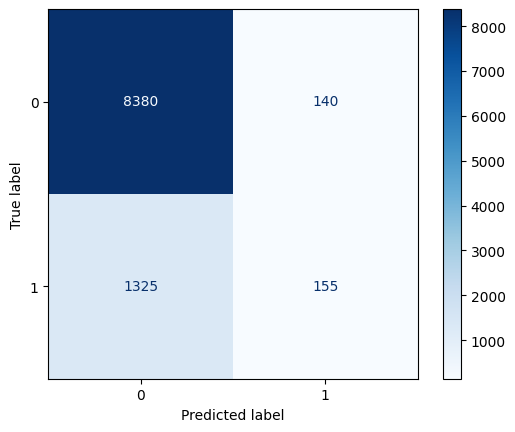

In [46]:
# Plot the confusion matrix
metrics.plot_confusion_matrix(model, X_important_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [47]:
feature_importances = pd.DataFrame({
    'features': X_important_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()
feature_importances

,index,features,importance
0,2,flight_time_of_day_evening,0.006217
1,7,extras,0.006999
2,16,flight_weekend_weekend,0.008571
3,15,flight_weekend_weekday,0.008638
4,4,flight_duration_8.58,0.009004
5,0,flight_duration_5.62,0.009054
6,10,flight_day_Sat,0.009122
7,6,route_PENTPE,0.009217
8,12,flight_day_Sun,0.009238
9,3,booking_origin_Indonesia,0.009632


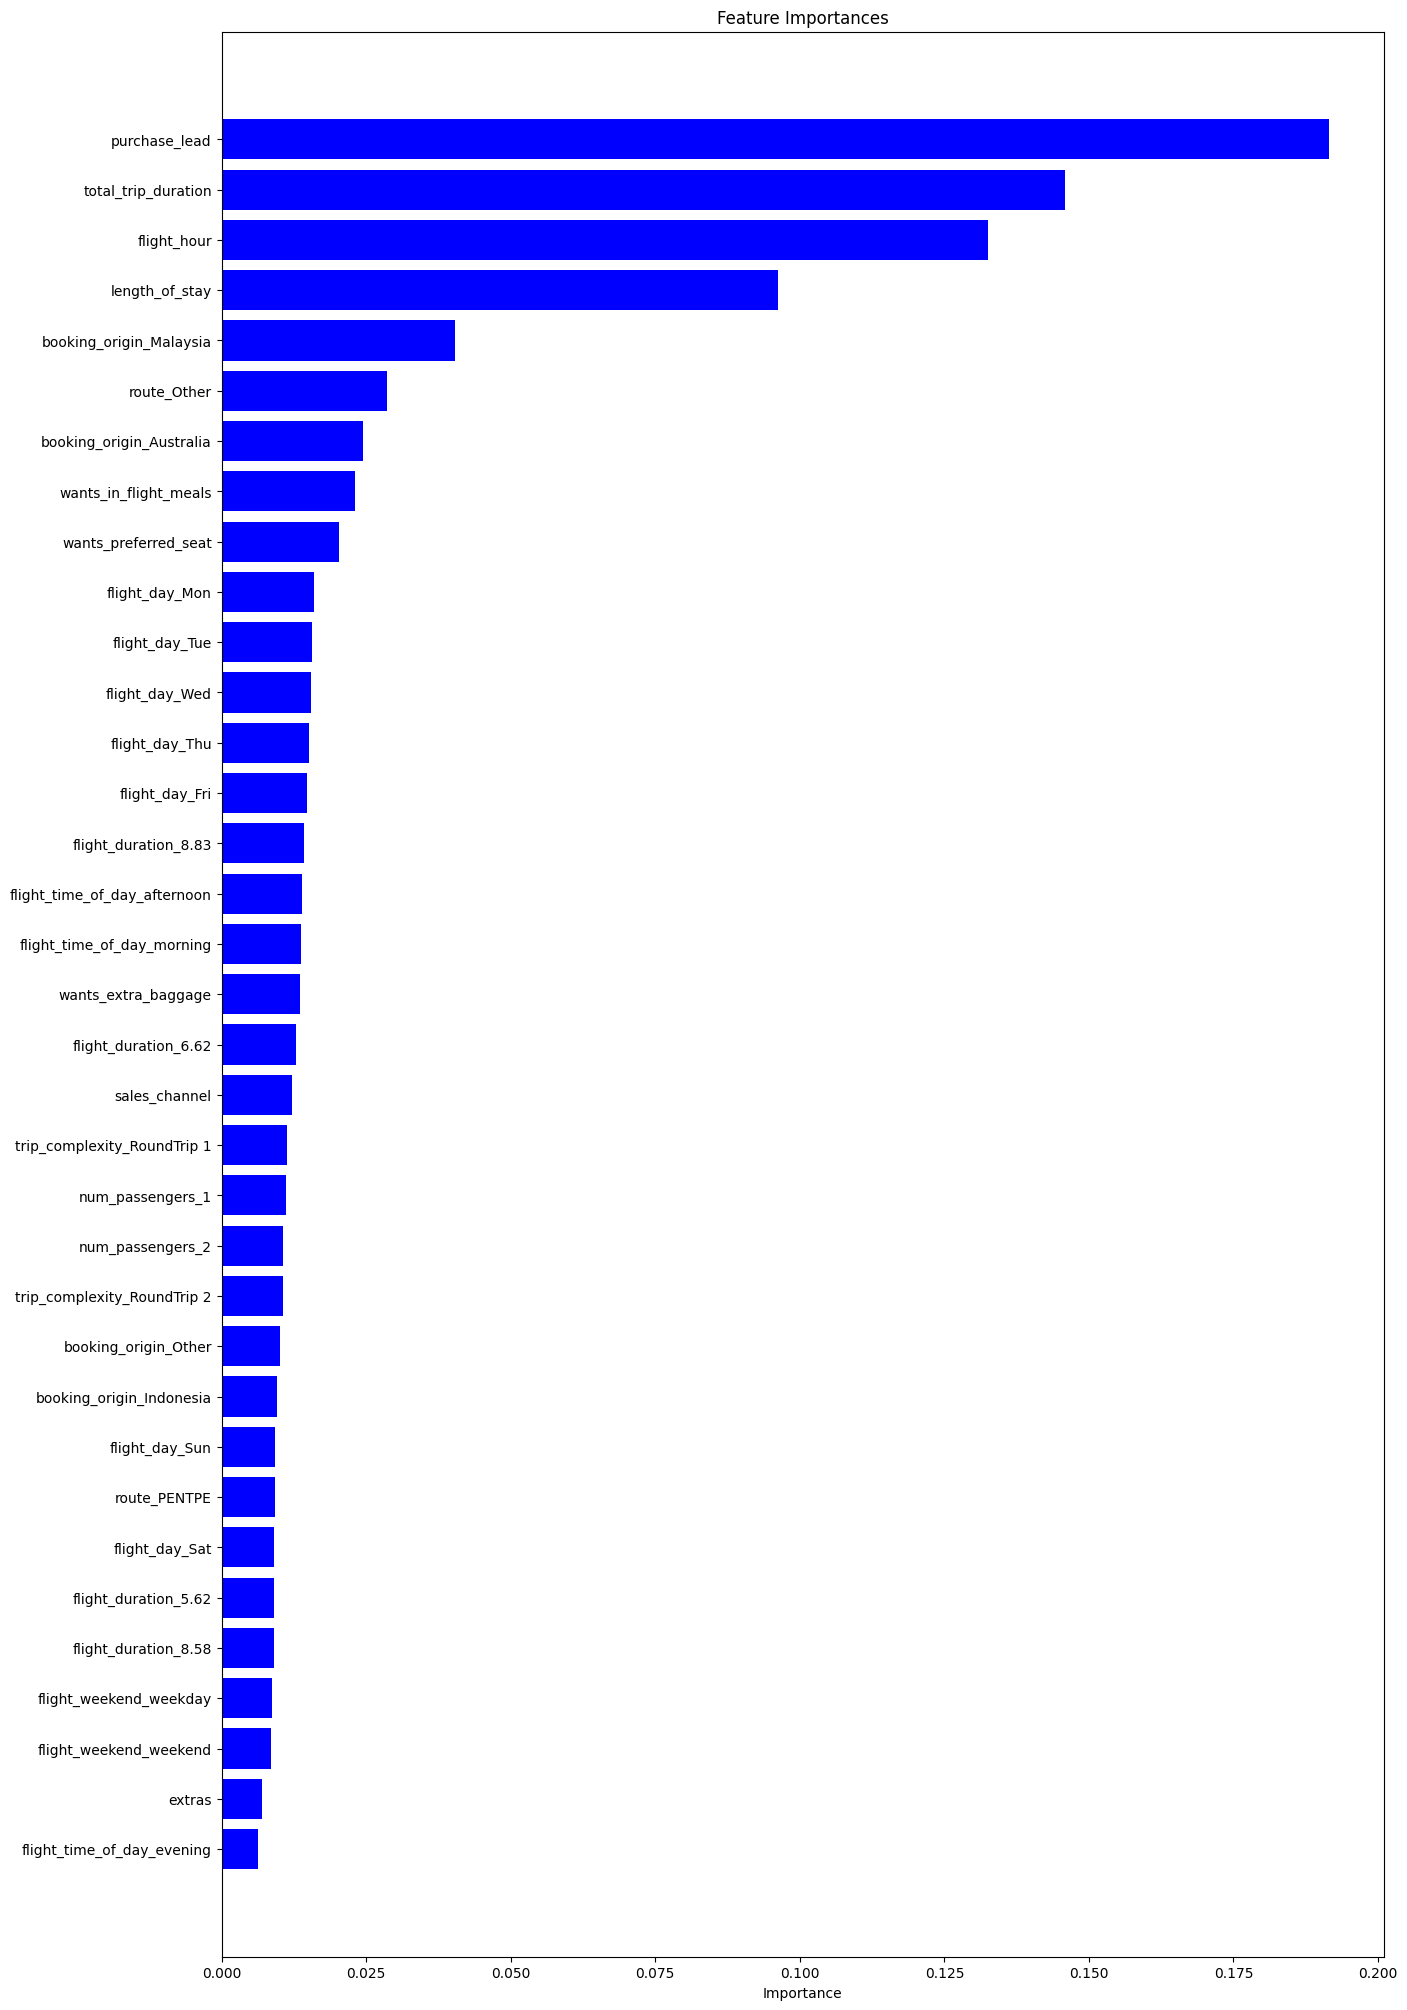

In [48]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()